# Kobe + PCA

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [1]:
import pandas as pd
import numpy as np

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# import plotting libraries
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# style
%matplotlib inline
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100, 'display.float_format', lambda x: '%.3f' % x)
#sns.set(style='white', context='notebook', palette='deep')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")

# https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=color

# Seven hls color palette (right)
#current_palette_7 = sns.color_palette("hls", 7)
#sns.set_palette(current_palette_7)

# inverted colors: https://encycolorpedia.com/c0d74d
# lakers colors: https://teamcolorcodes.com/los-angeles-lakers-color-codes/
# inverted 
# lakers_color = ["#c0d74d",  "#2550ff","#3498db", "#95a5a6", "#e74c3c", "#2ecc71"]
lakers_color = ["#552583", '#FDB927', "#000000", "#ffe4e1","#95a5a6", "#e74c3c"]
sns.set_palette(lakers_color)

In [20]:
kobe.head()

,Unnamed: 0,action_type,arena_temp,attendance,avgnoisedb,combined_shot_type,game_date,game_event_id,game_id,lat,loc_x,loc_y,lon,matchup,minutes_remaining,opponent,period,playoffs,recId,season,seconds_remaining,shot_distance,shot_id,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,kobe_shot_loc,prior_shot_made,cum_shot_made,opp,oppSeason,home_game,hot_hand,pts,field_goal_attempts,field_goal,three_pt_attempts,three_pt,fg_pct,three_pct,range_encoded,type_encoded,basic_encoded,WL_x,game_won_x,score_ratio_x,...,3P%_rating_x,top_rated,WL_y,game_won_y,score_ratio_y,OppSeason_y,OppDefRank_y,OppDef_Rating_y,Conf_y,Div_y,Same_Conf_y,Same_Div_y,Opp_margin_of_victory_y,LAL_Season_y,LA_mov_y,LA_offRating_y,net_la_v_oppd_rating_y,PTS_rating_y,FGM_rating_y,FGA_rating_y,FG%_rating_y,3PM_rating_y,3PA_rating_y,3P%_rating_y,PTS_rating,FGM_rating,FGA_rating,FG%_rating,3PM_rating,3PA_rating,3P%_rating,hot_hand_fire,hot_hand_heat,hot_hand_hot hand,hot_hand_nil,WL,game_won,score_ratio,OppSeason,OppDefRank,OppDef_Rating,Conf,Div,Same_Conf,Same_Div,Opp_margin_of_victory,LAL_Season,LA_mov,LA_offRating,net_la_v_oppd_rating
0,0,Jump Shot,69,14707,94.060,Jump Shot,36830,12,20000012,34.044,-157,0,-118.427,LAL @ POR,10,POR,1,0,1,2000-01,22,15,2,0.000,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,1.000,0.000,0.000,POR,POR2000-01,0,nil,0.000,1.000,0.000,0.000,0.000,0.000,0.000,2,0,4,W,1,10,...,81,1,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120,4,4,5,37,55,50,81,4,4,5,37,55,50,81,0,0,0,1,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120
1,1,Jump Shot,69,14707,94.060,Jump Shot,36830,35,20000012,33.909,-101,135,-118.371,LAL @ POR,7,POR,1,0,2,2000-01,45,16,3,nan,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,1.000,0.000,0.000,POR,POR2000-01,0,nil,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0,0,4,W,1,10,...,81,1,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120,4,4,5,37,55,50,81,4,4,5,37,55,50,81,0,0,0,1,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120
2,2,Jump Shot,69,14707,94.060,Jump Shot,36830,43,20000012,33.869,138,175,-118.132,LAL @ POR,6,POR,1,0,3,2000-01,52,22,4,nan,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,1.000,0.000,0.000,POR,POR2000-01,0,nil,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0,0,4,W,1,10,...,81,1,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120,4,4,5,37,55,50,81,4,4,5,37,55,50,81,0,0,0,1,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120
3,3,Driving Dunk Shot,69,14707,94.060,Dunk,36830,155,20000012,34.044,0,0,-118.270,LAL @ POR,6,POR,2,0,4,2000-01,19,0,5,1.000,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,1.000,0.000,1.000,POR,POR2000-01,0,heat,2.000,2.000,1.000,0.000,0.000,0.500,0.000,4,0,5,W,1,10,...,81,1,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120,4,4,5,37,55,50,81,4,4,5,37,55,50,81,0,1,0,0,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120
4,4,Jump Shot,69,14707,94.060,Jump Shot,36830,244,20000012,34.055,-145,-11,-118.415,LAL @ POR,9,POR,3,0,5,2000-01,32,14,6,0.000,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,1.000,1.000,0.000,POR,POR2000-01,0,nil,2.000,3.000,1.000,0.000,0.000,0.333,0.000,2,0,4,W,1,10,...,81,1,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120,4,4,5,37,55,50,81,4,4,5,37,55,50,81,0,0,0,1,W,1,10,POR2001,8,102.210,W,P,1,1,4.200,LAL2001,3.380,109.330,7.120


In [12]:
kobe = pd.read_csv("./data/kobe_dat.csv")
df = kobe[['loc_x', 'loc_y', 'shot_distance', 'shot_zone_range']]
df.head()

,loc_x,loc_y,shot_distance,shot_zone_range
0,-157,0,15,8-16 ft.
1,-101,135,16,16-24 ft.
2,138,175,22,16-24 ft.
3,0,0,0,Less Than 8 ft.
4,-145,-11,14,8-16 ft.


In [17]:
df.shot_zone_range.unique()

array(['8-16 ft.', '16-24 ft.', 'Less Than 8 ft.', '24+ ft.',
       'Back Court Shot'], dtype=object)

In [13]:
from sklearn.preprocessing import StandardScaler
features = ['loc_x', 'loc_y', 'shot_distance']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['shot_zone_range']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [16]:
finalDf = pd.concat([principalDf, df[['shot_zone_range']]], axis = 1)

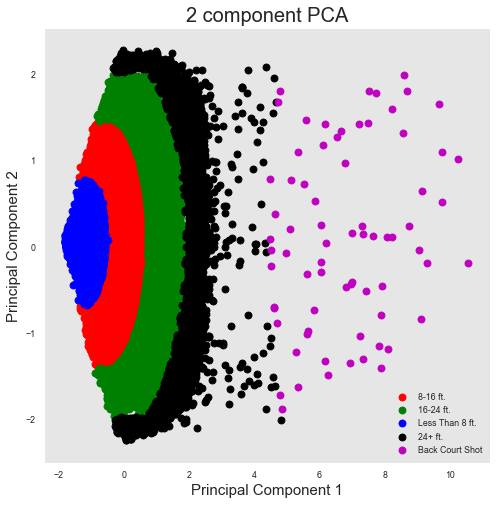

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['8-16 ft.', '16-24 ft.', 'Less Than 8 ft.', '24+ ft.','Back Court Shot']
colors = ['r', 'g', 'b', 'k', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['shot_zone_range'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()